Class Distribution in Original Data:
1    357
0    212
Name: count, dtype: int64

Class Distribution in Training Set (After Normalization):
1    286
0    169
Name: count, dtype: int64

Class Distribution in Testing Set (After Normalization):
1    71
0    43
Name: count, dtype: int64


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

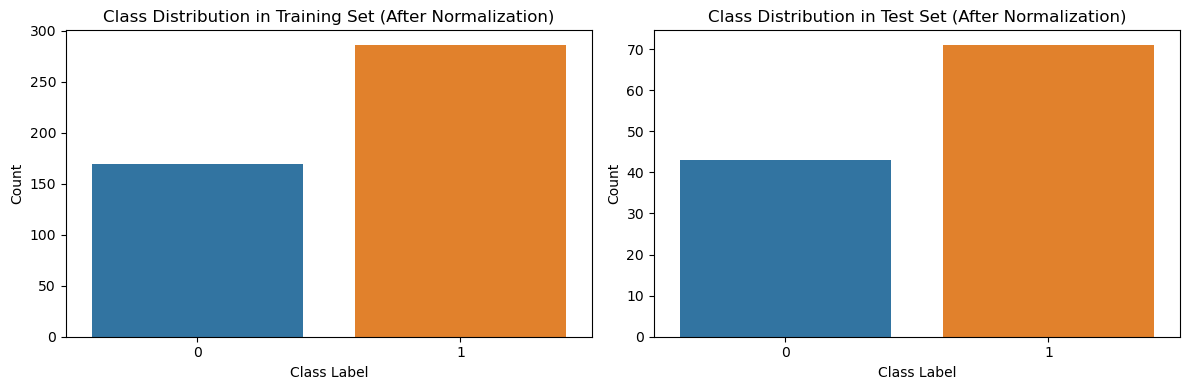

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, confusion_matrix, accuracy_score, adjusted_mutual_info_score
from sklearn.decomposition import FastICA, PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import random_projection
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
from umap import UMAP


# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Print class distribution before normalization
print("Class Distribution in Original Data:")
print(pd.Series(y).value_counts())

# Handling missing NaN values (replacing with mean)
X = np.nan_to_num(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing the data between 0 and 1
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Print class distribution after normalization
print("\nClass Distribution in Training Set (After Normalization):")
print(pd.Series(y_train).value_counts())

print("\nClass Distribution in Testing Set (After Normalization):")
print(pd.Series(y_test).value_counts())

# 4. Visualize class distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set (After Normalization)")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set (After Normalization)")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


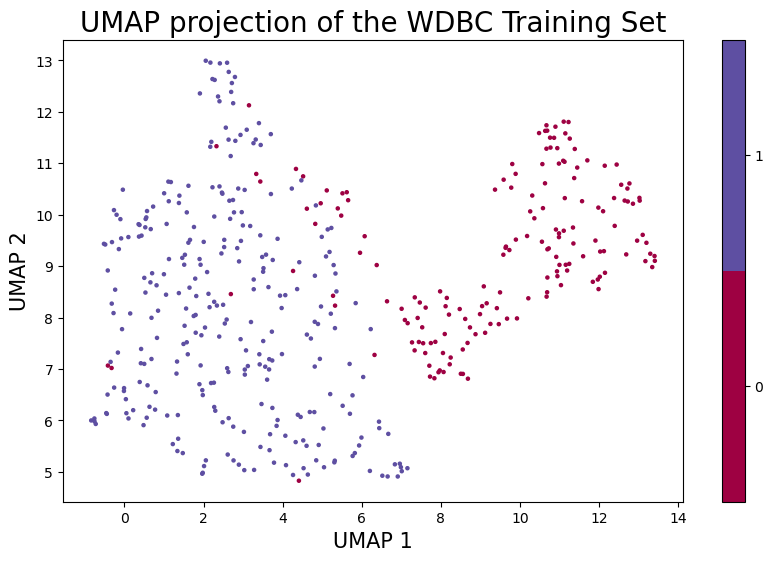

In [2]:
# Create a UMAP instance
umap = UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)

# Fit UMAP and transform the training data
X_train_umap = umap.fit_transform(X_train)

# Now, let's plot the result
plt.figure(figsize=(10, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
plt.title('UMAP projection of the WDBC Training Set', fontsize=20)
plt.xlabel('UMAP 1', fontsize=15)
plt.ylabel('UMAP 2', fontsize=15)
plt.show()


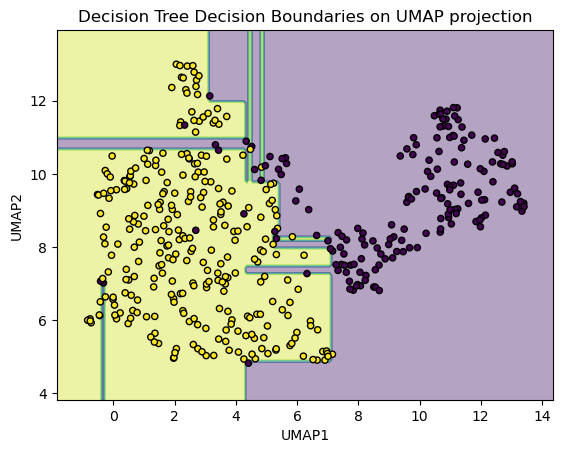

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Train classifier on UMAP output
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_umap, y_train)

# Create mesh grid for decision boundary
x_min, x_max = X_train_umap[:, 0].min() - 1, X_train_umap[:, 0].max() + 1
y_min, y_max = X_train_umap[:, 1].min() - 1, X_train_umap[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict decision boundary
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Decision Tree Decision Boundaries on UMAP projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


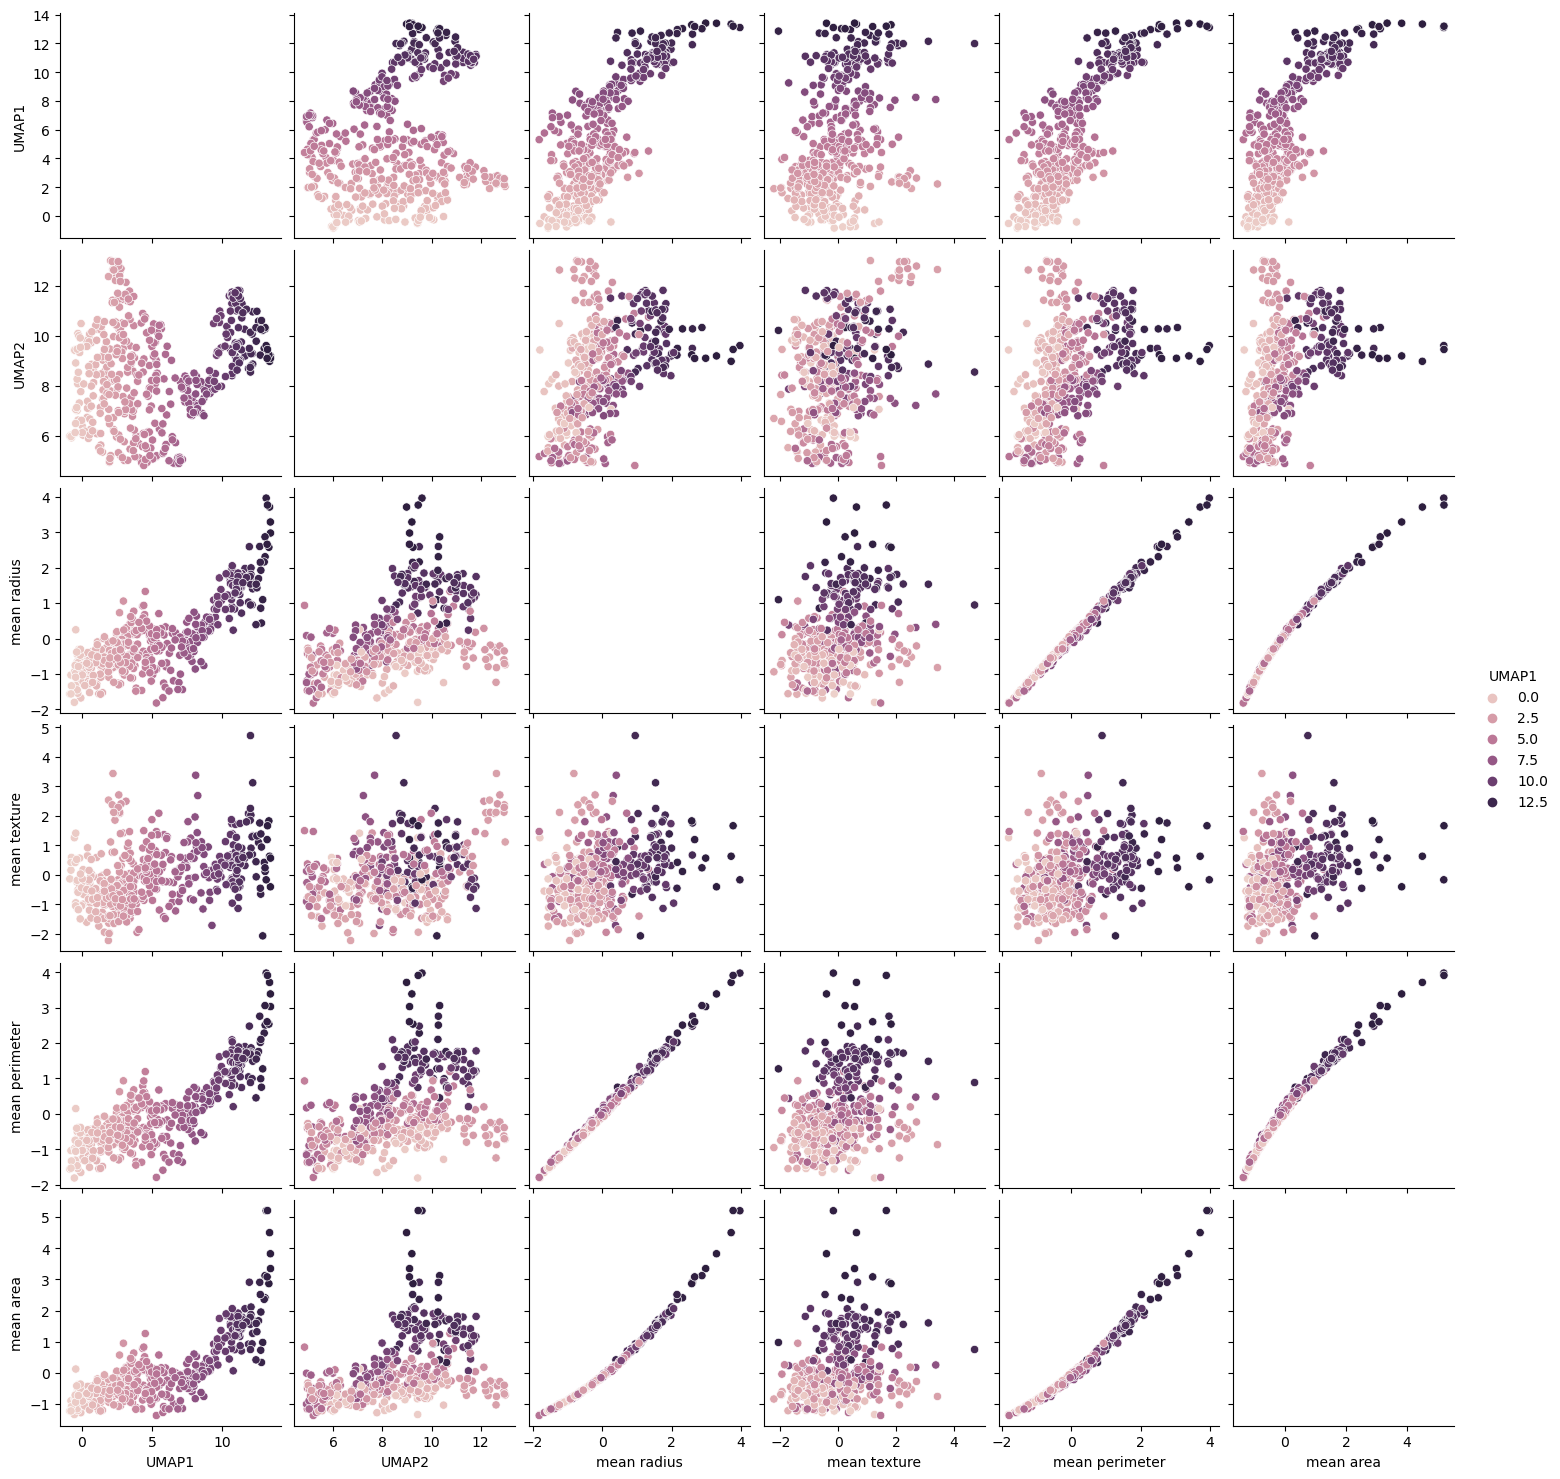

In [7]:
# Create a DataFrame with the UMAP components
df_umap = pd.DataFrame(X_train_umap, columns=['UMAP1', 'UMAP2'])
df_original_features = pd.DataFrame(X_train, columns=data.feature_names)

# Concatenate the UMAP components to the original features
df_combined = pd.concat([df_original_features, df_umap], axis=1)

# Now create a pairplot
import seaborn as sns
sns.pairplot(df_combined, vars=['UMAP1', 'UMAP2'] + list(data.feature_names[:4]), hue='UMAP1')
plt.show()


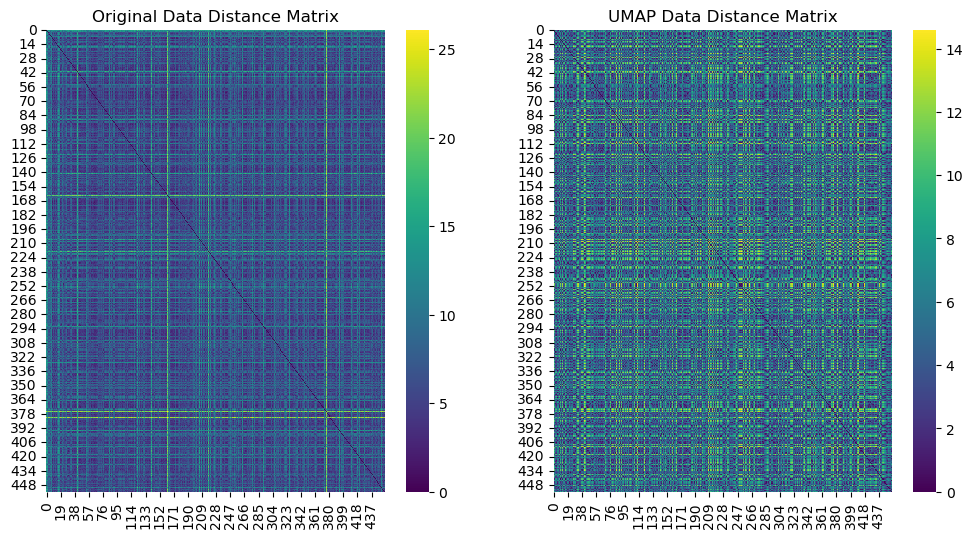

In [8]:
from scipy.spatial.distance import pdist, squareform

# Calculate Euclidean distance matrix for original data
dist_matrix_orig = squareform(pdist(X_train, 'euclidean'))

# Calculate Euclidean distance matrix for UMAP data
dist_matrix_umap = squareform(pdist(X_train_umap, 'euclidean'))

# Plot Heatmap of Euclidean Distances for original and UMAP data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(dist_matrix_orig, ax=ax[0], cmap='viridis')
ax[0].set_title('Original Data Distance Matrix')
sns.heatmap(dist_matrix_umap, ax=ax[1], cmap='viridis')
ax[1].set_title('UMAP Data Distance Matrix')
plt.show()


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 2, silhouette score = 0.4789171516895294


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 3, silhouette score = 0.471061110496521


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 4, silhouette score = 0.498404324054718


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 5, silhouette score = 0.49886554479599


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 6, silhouette score = 0.495105117559433


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 7, silhouette score = 0.509141206741333


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 8, silhouette score = 0.5049609541893005


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 9, silhouette score = 0.49574363231658936


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_components = 10, silhouette score = 0.4982070326805115


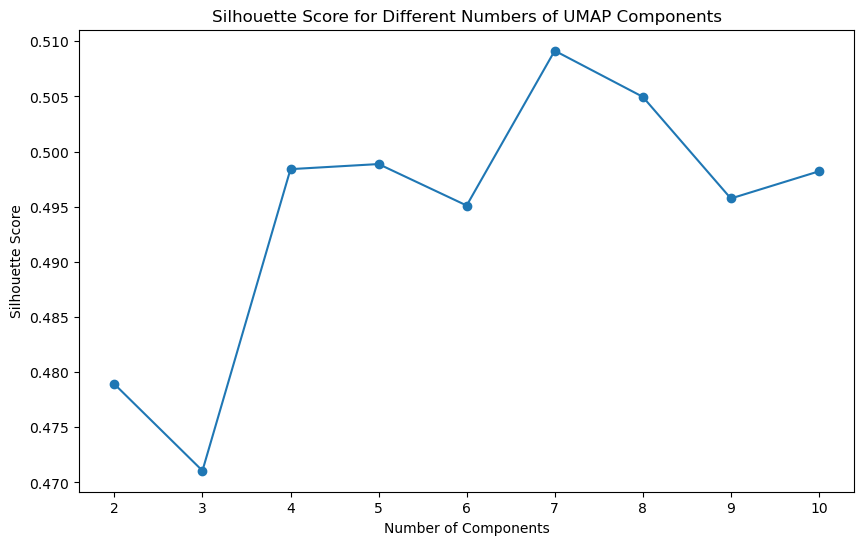

In [6]:
from sklearn.metrics import silhouette_score

# List to hold silhouette scores for different numbers of components
silhouette_scores = []

# Range of n_components to try
n_components_range = range(2, 11)

# Loop through the range
for n_components in n_components_range:
    umap = UMAP(n_neighbors=5, min_dist=0.3, n_components=n_components, random_state=42)
    X_train_umap = umap.fit_transform(X_train)
    score = silhouette_score(X_train_umap, y_train)
    silhouette_scores.append(score)
    print(f"n_components = {n_components}, silhouette score = {score}")

# Now plot the scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of UMAP Components')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.show()


Silhouette Score for 2 components: 0.5454152822494507
Silhouette Score for 3 components: 0.42555227875709534
Silhouette Score for 4 components: 0.36233964562416077
Silhouette Score for 5 components: 0.3980516493320465
Silhouette Score for 6 components: 0.3880968689918518
Silhouette Score for 7 components: 0.35294997692108154
Silhouette Score for 8 components: 0.37683284282684326
Silhouette Score for 9 components: 0.38664382696151733
Silhouette Score for 10 components: 0.3879259526729584
Best number of components found: 2 with a silhouette score of 0.5454152822494507


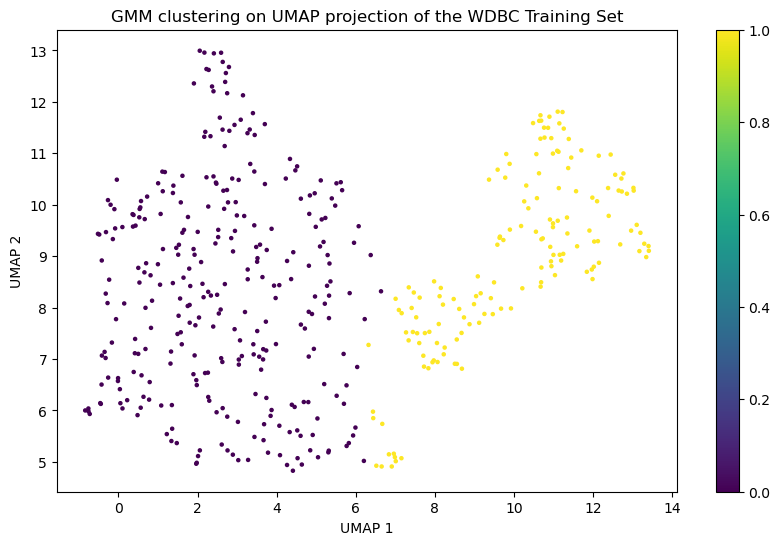

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Use UMAP-transformed data to fit Gaussian Mixture Model
# We'll try a range of cluster numbers and see which gives the best silhouette score

n_components_range = range(2, 11)  # Example range from 2 to 10
best_score = -1
best_gmm = None
best_n_components = 0

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_train_umap)
    cluster_labels = gmm.predict(X_train_umap)
    silhouette_avg = silhouette_score(X_train_umap, cluster_labels)
    print(f"Silhouette Score for {n_components} components: {silhouette_avg}")

    # Keep track of the best number of components based on the silhouette score
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_gmm = gmm
        best_n_components = n_components

# Print the best number of components
print(f"Best number of components found: {best_n_components} with a silhouette score of {best_score}")

# Now let's visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=best_gmm.predict(X_train_umap), cmap='viridis', s=5)
plt.colorbar()
plt.title('GMM clustering on UMAP projection of the WDBC Training Set')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means: 0.5484022498130798
SSE for K-Means: 3240.0673828125


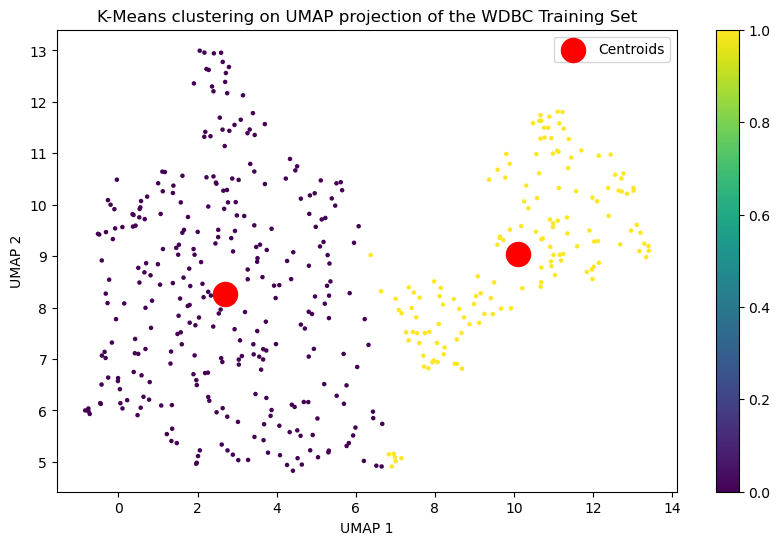

In [5]:
from sklearn.cluster import KMeans

# Perform KMeans clustering with the optimal number of clusters found
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_umap)
kmeans_labels = kmeans.predict(X_train_umap)

# Calculate Silhouette Score
kmeans_silhouette = silhouette_score(X_train_umap, kmeans_labels)
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

# Calculate SSE (Sum of Squared Errors)
sse = kmeans.inertia_
print(f"SSE for K-Means: {sse}")

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=kmeans_labels, cmap='viridis', s=5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.colorbar()
plt.title('K-Means clustering on UMAP projection of the WDBC Training Set')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

In [7]:
#EM clustering

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Optimal number of clusters according to BIC: 10
Optimal number of clusters according to AIC: 10


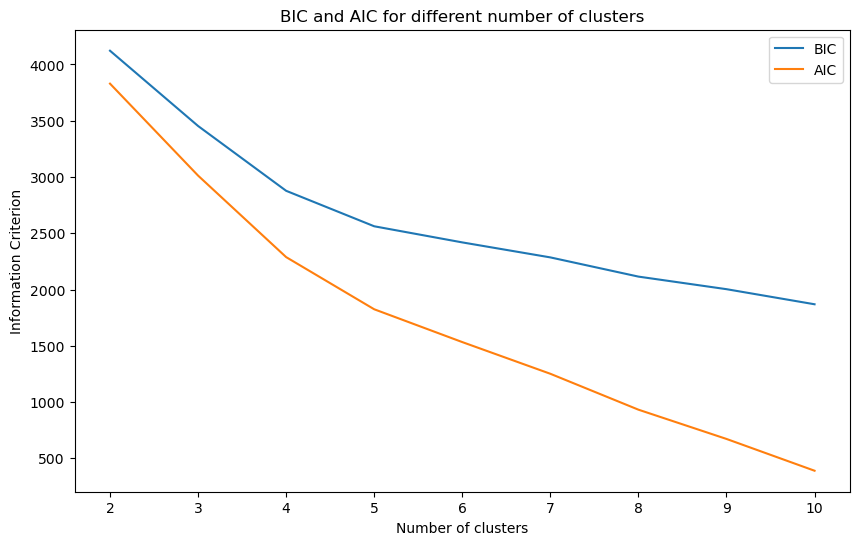

In [8]:
# Your previous code...
# [...]
# 4. Visualize class distribution
# [...]

from sklearn.mixture import GaussianMixture

# Assuming you have selected the number of components based on your silhouette analysis.
# For instance, let's use 7 components as it had the highest silhouette score in your output.
n_components_umap = 7

# Apply UMAP transformation on the training data with the selected number of components.
umap = UMAP(n_neighbors=5, min_dist=0.3, n_components=n_components_umap, random_state=42)
X_train_umap = umap.fit_transform(X_train)

# Gaussian Mixture Model - Searching for the optimal number of clusters
n_clusters_range = range(2, 11)  # Change this range if necessary
gmms = [GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42).fit(X_train_umap) for n_clusters in n_clusters_range]

# Calculate the BIC and AIC for each model
bics = [model.bic(X_train_umap) for model in gmms]
aics = [model.aic(X_train_umap) for model in gmms]

# Identify the optimal number of clusters based on the lowest BIC
optimal_n_clusters_bic = n_clusters_range[np.argmin(bics)]
print(f'Optimal number of clusters according to BIC: {optimal_n_clusters_bic}')

# Identify the optimal number of clusters based on the lowest AIC
optimal_n_clusters_aic = n_clusters_range[np.argmin(aics)]
print(f'Optimal number of clusters according to AIC: {optimal_n_clusters_aic}')

# Plot the BIC and AIC values to visually inspect them
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, bics, label='BIC')
plt.plot(n_clusters_range, aics, label='AIC')
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Information Criterion')
plt.title('BIC and AIC for different number of clusters')
plt.show()

# Now you can use the best model according to BIC or AIC to predict the clusters
best_gmm = gmms[np.argmin(bics)]  # or aics if you prefer AIC
clusters = best_gmm.predict(X_train_umap)


n_clusters = 2, silhouette score = 0.3235023021697998
n_clusters = 3, silhouette score = 0.3235023021697998
n_clusters = 4, silhouette score = 0.3235023021697998
n_clusters = 5, silhouette score = 0.3235023021697998
n_clusters = 6, silhouette score = 0.3235023021697998
n_clusters = 7, silhouette score = 0.3235023021697998
n_clusters = 8, silhouette score = 0.3235023021697998
n_clusters = 9, silhouette score = 0.3235023021697998
n_clusters = 10, silhouette score = 0.3235023021697998


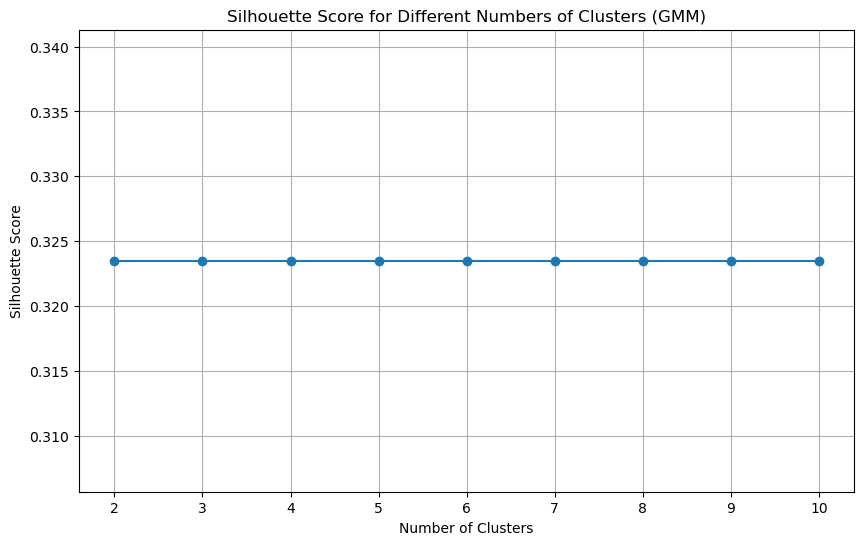

Optimal number of clusters according to silhouette score: 2


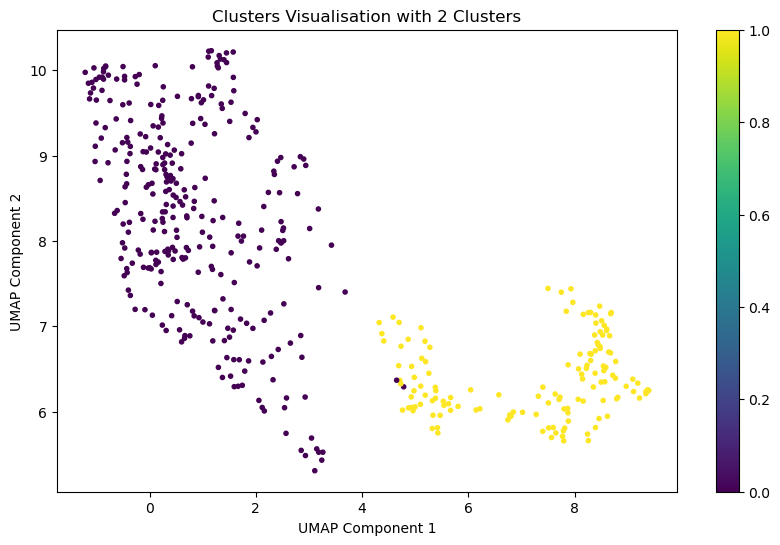

In [10]:
# Your previous code...
# [...]

# We already have X_train_umap transformed by UMAP

# Now we will use the silhouette score to find the optimal number of clusters
from sklearn.metrics import silhouette_score

# List to hold silhouette scores for different numbers of clusters
silhouette_scores_gmm = []

# Range of n_clusters to try
n_clusters_range = range(2, 11)

# Loop through the range of n_clusters
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=7, random_state=42)
    gmm_labels = gmm.fit_predict(X_train_umap)
    silhouette_avg = silhouette_score(X_train_umap, gmm_labels)
    silhouette_scores_gmm.append(silhouette_avg)
    print(f"n_clusters = {n_clusters}, silhouette score = {silhouette_avg}")

# Plotting the silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores_gmm, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters (GMM)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Identifying the optimal number of clusters with the highest silhouette score
optimal_n_clusters_silhouette = n_clusters_range[np.argmax(silhouette_scores_gmm)]
print(f'Optimal number of clusters according to silhouette score: {optimal_n_clusters_silhouette}')

# Fit the GMM with the optimal number of clusters
best_gmm = GaussianMixture(n_components=optimal_n_clusters_silhouette, random_state=42)
best_gmm.fit(X_train_umap)
gmm_labels = best_gmm.predict(X_train_umap)

# Visualization of clusters in the first two UMAP components
plt.figure(figsize=(10, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=gmm_labels, cmap='viridis', marker='.')
plt.colorbar()
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title(f'Clusters Visualisation with {optimal_n_clusters_silhouette} Clusters')
plt.show()

In [19]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score
# Import necessary classes
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train_umap)
labels = gmm.predict(X_train_umap)

# Assuming gmm is your fitted GaussianMixture model
labels = gmm.predict(X_train_umap)

# Assume gmm is your fitted GaussianMixture model
labels = gmm.predict(X_train_umap)

# Davies-Bouldin Score
db_score = davies_bouldin_score(X_train_umap, labels)

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_train_umap, labels)

# Adjusted Rand Index
ari_score = adjusted_rand_score(y_train, labels)

# Adjusted Mutual Information
ami_score = adjusted_mutual_info_score(y_train, labels)

# Print the scores
print(f"Davies-Bouldin Score: {db_score}")
print(f"Calinski-Harabasz Index: {ch_score}")
print(f"Adjusted Rand Index: {ari_score}")
print(f"Adjusted Mutual Information: {ami_score}")

Davies-Bouldin Score: 0.5614383958874708
Calinski-Harabasz Index: 1065.1626316427958
Adjusted Rand Index: 0.7585189144933704
Adjusted Mutual Information: 0.6995453254107402


In [20]:
#K-Means

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value

Silhouette score for 2 clusters: 0.6081380844116211
Silhouette score for 3 clusters: 0.38900884985923767
Silhouette score for 4 clusters: 0.36850082874298096
Silhouette score for 5 clusters: 0.3651333749294281
Silhouette score for 6 clusters: 0.37379637360572815
Silhouette score for 7 clusters: 0.39329418540000916


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

Silhouette score for 8 clusters: 0.40256667137145996
Silhouette score for 9 clusters: 0.3683341443538666


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 10 clusters: 0.3668815791606903
Best silhouette score is 0.6081380844116211 for n_clusters = 2
SSE with 2 clusters: 1979.32958984375


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

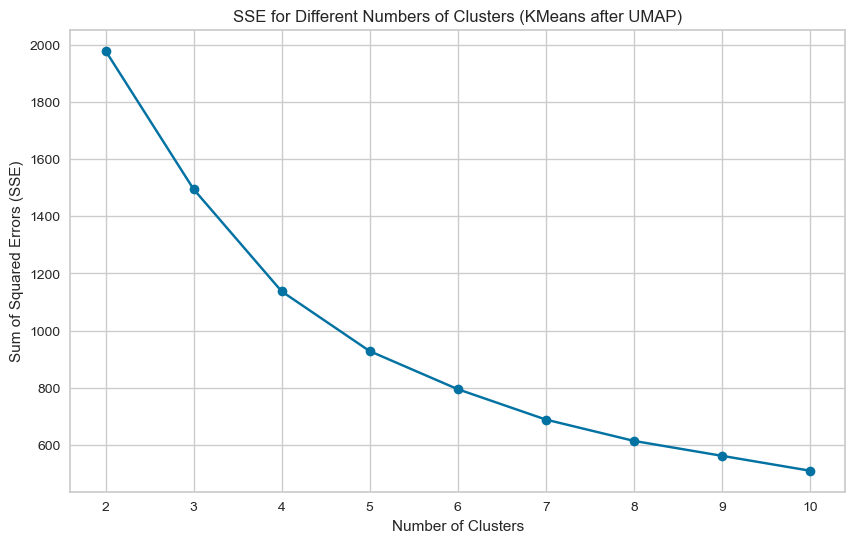

In [22]:
from sklearn.metrics import silhouette_score

# Find the optimal number of clusters for KMeans after applying UMAP with the optimal number of components
optimal_n_components = 7  # This is based on your prior UMAP results
umap = UMAP(n_neighbors=5, min_dist=0.3, n_components=optimal_n_components, random_state=42)
X_train_umap = umap.fit_transform(X_train)

# Search for the optimal number of clusters
range_n_clusters = range(2, 11)  # Example range, you can adjust this
best_n_clusters = 0
best_silhouette = -1

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_train_umap)
    silhouette_avg = silhouette_score(X_train_umap, cluster_labels)

    print(f"Silhouette score for {n_clusters} clusters: {silhouette_avg}")

    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_n_clusters = n_clusters

print(f"Best silhouette score is {best_silhouette} for n_clusters = {best_n_clusters}")

# Now that we have the best_n_clusters, we can compute SSE
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans.fit(X_train_umap)
sse = kmeans.inertia_
print(f"SSE with {best_n_clusters} clusters: {sse}")

# Plot the SSE curve
sse_values = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_umap)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sse_values, marker='o')
plt.title('SSE for Different Numbers of Clusters (KMeans after UMAP)')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()
